In [1]:
import json
def read_data(filename):
    review_list=[]
    with open(filename,'r',encoding='utf-8') as f:
        line = f.readline()
        while(line):
            review_data_dict = json.loads(line)
            line = f.readline()
            review_list.append(review_data_dict)
    return review_list


review_list=read_data('CellPhoneReview.json')
print(len(review_list))
review_text_list=[]
pos_text_list=[]
neg_text_list=[]
neu_text_list=[]
sentiment_score_list=[]
for review_item in review_list:
    assert 'overall' in review_item.keys()
    if int(review_item['overall']) >3:
        sentiment_score_list.append(2)
        assert 'reviewText' in review_item.keys()
        review_text_list.append(review_item['reviewText'])
        assert 'summary' in review_item.keys()
        pos_text_list.append(review_item['summary'])
    elif int(review_item['overall']) <3:
        sentiment_score_list.append(0)
        assert 'reviewText' in review_item.keys()
        review_text_list.append(review_item['reviewText'])
        assert 'summary' in review_item.keys()
        neg_text_list.append(review_item['summary'])
    else:
        sentiment_score_list.append(1)
        assert 'reviewText' in review_item.keys()
        review_text_list.append(review_item['reviewText'])
        assert 'summary' in review_item.keys()
        neu_text_list.append(review_item['summary'])
assert len(review_text_list)==len(sentiment_score_list)
print(len(review_text_list))


190919
190919


In [3]:
import re
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    return reviewText
review_text_list=list(map(cleanReviews, review_text_list))
pos_text_list = list(map(cleanReviews, pos_text_list))
neu_text_list = list(map(cleanReviews, neu_text_list))
neg_text_list = list(map(cleanReviews, neg_text_list))

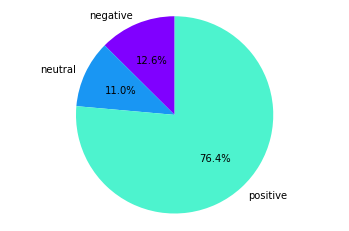

In [4]:
from matplotlib import pyplot as plt
from  matplotlib import cm
import numpy as np

colors = cm.rainbow(np.arange(5)/5)
score_dict={}
for score in sentiment_score_list:
    score = int(score)
    if score not in score_dict:
        score_dict[score] =0
    score_dict[score]+=1
labels = 'negative', 'neutral', 'positive'
sizes = [score_dict[k] for k in range(0,3)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%'
      , startangle=90,colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('sentiment_distribution.png')
plt.show()

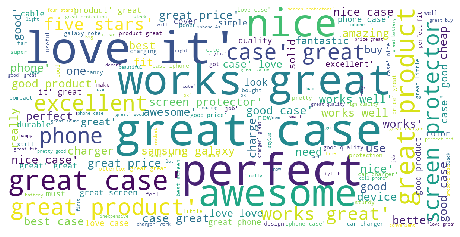

In [10]:
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(pos_text_list)

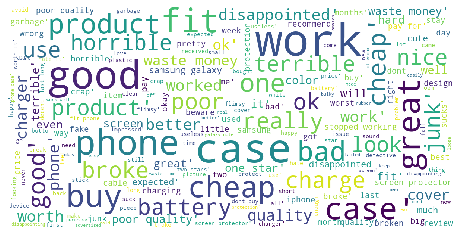

In [11]:
show_wordcloud(neg_text_list)

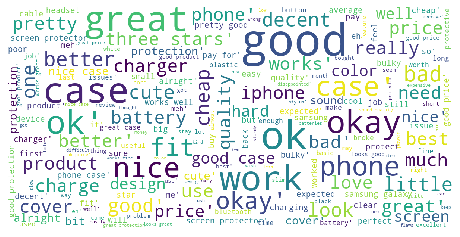

In [12]:
show_wordcloud(neu_text_list)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(review_text_list,sentiment_score_list,test_size=0.3,random_state=12)
print(len(X_train))
print(len(X_test))

133643
57276


In [6]:
import csv
import pandas as pd
import numpy as np
import nltk
import string
import re

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [17]:
prediction = dict()

In [19]:
countVector = CountVectorizer(stop_words='english')
X_train_counts = countVector.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = countVector.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
logreg = LogisticRegression(C=1e5,multi_class='multinomial')
logreg_result = logreg.fit(X_train_tfidf, Y_train)
prediction['removing_stop_words'] = logreg.predict(X_test_tfidf)

/Users/helinzi/opt/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
countVector = CountVectorizer()
X_train_counts = countVector.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = countVector.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
logreg = LogisticRegression(C=1e5,multi_class='multinomial')
logreg_result = logreg.fit(X_train_tfidf, Y_train)
prediction['keeping_stop_words'] = logreg.predict(X_test_tfidf)

/Users/helinzi/opt/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
countVector = CountVectorizer(ngram_range=(1,2))
X_train_counts = countVector.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = countVector.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
logreg = LogisticRegression(C=1e5,multi_class='multinomial')
logreg_result = logreg.fit(X_train_tfidf, Y_train)
prediction['ngrams'] = logreg.predict(X_test_tfidf)

/Users/helinzi/opt/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
from util import print_score

In [25]:
print_score(prediction['removing_stop_words'],Y_test)

f1-score
0.23634980633504066
precision
0.2517369498188101
recall
0.23124171720028838
acc
0.8200118723374538


In [24]:
print_score(prediction['keeping_stop_words'],Y_test)

f1-score
0.24250978311858015
precision
0.2561958152793452
recall
0.23709466637645105
acc
0.8269083036524897


In [26]:
print_score(prediction['ngrams'],Y_test)

f1-score
0.2541033855133506
precision
0.26049319148849526
recall
0.2496275631771041
acc
0.8366855227320343


In [27]:
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs.sort_values(by='coefficient')

,feature,coefficient
934371,perfect,-20.060723
742714,love,-18.160827
441295,excellent,-16.782018
935529,perfectly,-16.520564
842782,not bad,-14.932393
...,...,...
599421,horrible,16.934664
846997,not worth,20.167437
966911,poor,20.210481
845695,not recommend,20.565024
